# Project: TMDb (The Movie Database) Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The aim of the project is to investigate a dataset using Python along with external libraries and tools such as Anacondas, Pandas, NumPy and Matplotlib.

This data set contains information about 10,000 movies collected from [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en), including user ratings and revenue, while lacking profit which will be created. The Dataset features the movie name, vote score, vote count, genre, director, cast, revenue and budget along with other information.

As an advanced extra step, we're thinking of writting a python web-scrapping script to fetch the budget values from IMDB and complete our missing values, but this will be done only if I have time.



The project steps will be in the following order:

** Step 1: Ask questions **

Given a movie dataset, we will either ask questions based on it, or we ask questions first and gather data based on that later. In both cases, great questions help us focus on relevant parts of your data and direct your analysis towards meaningful insights.

** Step 2: Wrangle data**

gather, assess, clean. 
Assessing data to identify any problems in your data’s quality or structure, and clean our data by modifying, replacing, or removing data to ensure that your dataset is of the highest quality and as well-structured as possible.

**Step 3: Perform EDA (Exploratory Data Analysis)**

We explore and then augment our data to maximize the potential of your analyses, visualizations, and models. Exploring involves finding patterns in your data, visualizing relationships in your data, and building intuition about what you’re working with. 

**Step 4: Draw conclusions (or even make predictions)**

This step is typically approached with machine learning or inferential statistics that are beyond the scope of this project, which will focus on drawing conclusions with descriptive statistics.



<a id='questions'></a>
## 1 Questions

1- What are the genres that are popular from year to year?

2- How many unique genres, What are their distribution?

3- Which decade had the most movies, What are the movie distribution across the decades?

4- What are the top profitable Movies?

5- What is the most profitable movie in each Genre?

6- What is the most repetitive genre for the 'highest profitable' movies ?

7- Which directors and actors work with each other the most?

8- Is there a Corelation between movie score and profit?

9- Is there a Corelation between movie score and popularity?

10- Whom are some of the dominant actors?


In [1]:
# Using this cell to set up import statements for all of the packages that I need
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## 2 Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### Assessing General Properties

In [2]:
# Load data and print out a few lines. Perform operations to inspect data and have an idea how the data look like.
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Multi-valued Columns
We can see here that we have 3 data types that are multi-valued, this will impact our aggregations, gropping and hence the visualization which makes answering questions harder.
This will be addressed in the cleaning part. 

The Multi-Value columns are:
- Cast
- Genre
- Production Company

#### Skimming and Scanning Dataset General Proprties
In the upcoming section, we will investigate the dataset briefly to identify its genral proprties through the below methods:
- Shape: This will determine the dataset size (rows and columns)
- info: This will identify three major things
        
        a) The column names.
        b) The Null values.
        c) The data type of each column
        
- nunique: Number of unique values in each column
- describe: This will provide basic inution about dataset's mean, std, min and max numerical values.


In [3]:
# We can see dataset is around 10K rows and 21 columns before cleaning
tmdb_df.shape

(10866, 21)

In [4]:
# Below is each datatype for each column along with its name the null values. 
# You can know It's null if the row number is less than the dataset total row number.
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Outputting the unique values
tmdb_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
## Porviding mean, std min, max and quartiles for each numerical value in the dataset.
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Duplicates
Below we can run function duplicated to check the duplicate columns. This output Boolean for each row, applying function sum() on it will only sum the True values, and hence we know the count of duplicate row.

We can see we only have 1 duplicate row, which is the movie 'Tekken'.

This will be remove during cleaning.

In [7]:
# Checking Number of Duplicate Data. We can see we have only one duplicate row.
print(sum(tmdb_df.duplicated()))
tmdb_df[tmdb_df.duplicated() == True]

1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Null Values

Cleaning Null values will allow us work further, because with Null we won't be able to run computations, grouping or any other functions. We can see we have 9 columns that include Null Values, and the latter command will print the count of NULL row in each column. Note we will only remove the Nulls of the columns that we will work on for our related Questions, so we can have as much information as possible. Some other columns will be dropped latter.

In [8]:
# Checking for Null Values
tmdb_df.columns[tmdb_df.isnull().any()]

Index([u'imdb_id', u'cast', u'homepage', u'director', u'tagline', u'keywords',
       u'overview', u'genres', u'production_companies'],
      dtype='object')

In [9]:
# Counting Number of Null Values
tmdb_df.isnull().sum().sort_values(ascending =False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

#### Missing Values

Since most of important questions are around profit, we will need to deduce profit first as revenue minus the budget. However, the problem here is that we have missing budgets and missing revenues, and in other times both of them missing. 

The below commands will pring th enumber of missing values.

Since we will deduce the profit, you can see the query, for non-zeroed values for both revenues and profits, outputs 3855. This will be the number of rows that will have the profit either as a wining film or as a loosing one.

In [10]:
# Number of missing budget values
sum(tmdb_df['budget']==0)  

5696

In [11]:
# Number of missing revenue revenue
sum(tmdb_df['revenue']==0)      

6016

In [12]:
# Number of non-missing budget and revenue rows
sum((tmdb_df['budget'] == 0) & (tmdb_df['revenue'] == 0))

4701

In [13]:
# Number of missing budget and revenue rows
sum((tmdb_df['budget'] != 0) & (tmdb_df['revenue'] != 0))

3855

### Data Cleaning

In this part of Data Wrangling (Data Cleaning), we will attempt to clean the data. Data can be cleaned in several ways, for instance we will:
- Remove the Duplicate row (We only have one)
- Drop Columns that we won't need like the homepage URL and taglines.
- We will importantly drop NULL Columns, because without dropping the NULL Values, mathemtical operations and other functions can be hardly applied on such columns.
- Convert Multi-Valued columns into a single one, so we can aggregate our classes more easily. For example, after converting Genres to a single-valued, we found we have 20 unique genres.
- Convert Cast to a single valued to take the main star of the movie.

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Removing Duplicate Data and Verifying it's removed
tmdb_df.drop_duplicates(inplace=True)
sum(tmdb_df.duplicated())

0

In [15]:
# Dropping columns that are no-use to quesitons listed
tmdb_df.drop(['homepage','tagline'], axis=1, inplace=True)

In [16]:
# Dropping Null
tmdb_df.dropna(subset=['genres'],inplace=True)
tmdb_df.dropna(subset=['cast'],inplace=True)

In [17]:
# Converting release_date to a date format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

> **Hint**: In the below cell, we will split the values at the pipe '|' then take the 1st split and write it in the same column

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
tmdb_df['genres']=tmdb_df['genres'].apply(lambda x: x.split('|')[0])

In [19]:
tmdb_df.groupby('genres')['id'].nunique()

genres
Action             1589
Adventure           585
Animation           379
Comedy             2319
Crime               380
Documentary         392
Drama              2449
Family              143
Fantasy             271
Foreign               8
History              44
Horror              915
Music               100
Mystery             125
Romance             186
Science Fiction     213
TV Movie             78
Thriller            491
War                  58
Western              42
Name: id, dtype: int64

In [20]:
tmdb_df['cast']=tmdb_df['cast'].apply(lambda x: x.split('|')[0])

Since we have around 55 years, we will group the years by decades so it can be easier to visualize it and present insights as per decade rather than the year repetitively. You can see the more recent the decade is, the more movies we have, meaning we have more recent movies than older movies.

In [21]:
# Partitioning Data by Decade 
tmdb_60 = tmdb_df.query('release_year < 1970')
tmdb_70 = tmdb_df.query(' 1970 <= release_year < 1980')
tmdb_80 = tmdb_df.query(' 1980 <= release_year < 1990')
tmdb_90 = tmdb_df.query(' 1990 <= release_year < 2000')
tmdb_00 = tmdb_df.query(' 2000 <= release_year < 2010')
tmdb_10 = tmdb_df.query(' 2010 <= release_year <= 2015')

tmdb_60_count = tmdb_60['id'].count()
tmdb_70_count = tmdb_70['id'].count()
tmdb_80_count = tmdb_80['id'].count()
tmdb_90_count = tmdb_90['id'].count()
tmdb_00_count = tmdb_00['id'].count()
tmdb_10_count = tmdb_10['id'].count()

# Counting number of movies by each year
print("1960s: {} movies".format(tmdb_60_count))
print("1970s: {} movies".format(tmdb_70_count))
print("1980s: {} movies".format(tmdb_80_count))
print("1990s: {} movies".format(tmdb_90_count))
print("2000s: {} movies".format(tmdb_00_count))
print("2010s: {} movies".format(tmdb_10_count))


1960s: 359 movies
1970s: 505 movies
1980s: 1055 movies
1990s: 1761 movies
2000s: 3537 movies
2010s: 3550 movies


In [22]:
# This is the shape of the dataset after cleaning
tmdb_df.shape

(10767, 19)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - What are the genres that are popular from year to year?

In this posed question, the aim is to see the most dominant genre per decade, we can see it is comedy and daram. Below we're plotting Genre, Year and Count

In [23]:
tmdb_60_genres=tmdb_60.groupby(['genres']).popularity.count().sort_values(ascending=False)
tmdb_70_genres=tmdb_70.groupby(['genres']).popularity.count().sort_values(ascending=False)
tmdb_80_genres=tmdb_80.groupby(['genres']).popularity.count().sort_values(ascending=False)
tmdb_90_genres=tmdb_90.groupby(['genres']).popularity.count().sort_values(ascending=False)
tmdb_00_genres=tmdb_00.groupby(['genres']).popularity.count().sort_values(ascending=False)
tmdb_10_genres=tmdb_10.groupby(['genres']).popularity.count().sort_values(ascending=False)

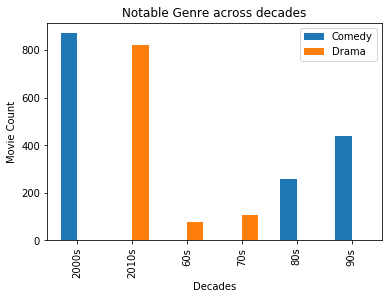

In [24]:
years = ["60s", "70s", "80s", "90s", "2000s", "2010s"]
heights = [tmdb_60_genres[0], tmdb_70_genres[0],tmdb_80_genres[0],tmdb_90_genres[0],tmdb_00_genres[0],tmdb_10_genres[0]]
labels =  [tmdb_60_genres.index[0], tmdb_70_genres.index[0],tmdb_80_genres.index[0],tmdb_90_genres.index[0],tmdb_00_genres.index[0],tmdb_10_genres.index[0]]

tmdb_60_genres=tmdb_60_genres[:1]
tmdb_70_genres=tmdb_70_genres[:1]
tmdb_80_genres=tmdb_80_genres[:1]
tmdb_90_genres=tmdb_90_genres.iloc[:1]
tmdb_00_genres=tmdb_00_genres[:1]
tmdb_10_genres=tmdb_10_genres[:1]

decades_genres=pd.DataFrame(
 {'60s': tmdb_60_genres,
  '70s': tmdb_70_genres,
  '80s': tmdb_80_genres,
  '90s': tmdb_90_genres,
  '2000s': tmdb_00_genres,
  '2010s': tmdb_10_genres,
 })
decades_genres=decades_genres.T
ax=decades_genres.plot(kind='bar',width=0.6, align='center', title='Notable Genre across decades');
ax.set_xlabel('Decades')
ax.set_ylabel('Movie Count');

We can see from the output that we have two genres dominating all the decades, and the recent the decade the more movies it has.

### Research Question 2 - How many unique genres, What are their distribution?

Below we will plot the distribution of each genre, across all years.

Text(0,0.5,u'Movie Frequenct')

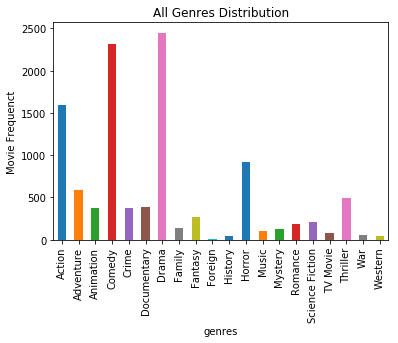

In [25]:
ax=tmdb_df.groupby('genres')['id'].nunique().plot(kind='bar', title='All Genres Distribution');
ax.set_ylabel('Movie Frequenct')

We can see that we have around 20 geres, foreign is the least, on the contrary Drama is the highest.

### Research Question 3 - Which decade had the most movies, What are the movie distribution across the decades?

The pie chart below plots the distribution of movies in the database across each decade, we can see an increase from decade to the the next one.

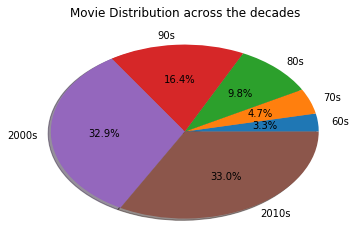

In [37]:
# Plotting Movies Distribution #
slices = [tmdb_60_count,tmdb_70_count,tmdb_80_count,tmdb_90_count,tmdb_00_count,tmdb_10_count]
plt.pie(slices,labels=years, shadow= True, autopct='%1.1f%%');
plt.title('Movie Distribution across the decades');

We can observe the recent the decade is, the more movies that slices has.

### Research Question 4 - What are the top profitable Movies

This questions is challenging, because we will have to calculate the profit which will be deductin budget from revenue, but we have to do this only for both revenue and proft that have values. So we will start by doing a query of values of budget and revenus that are non zero and we will copy them into a new dataframe called tmdb_df_profit. We should have around 3855 columns. After that we will sort it according to our new calculated profit then present the results.

In [27]:
tmdb_df_profit=tmdb_df[(tmdb_df['budget'] != 0) & (tmdb_df['revenue'] != 0)].copy()


In [28]:
tmdb_df_profit=tmdb_df[(tmdb_df['budget'] != 0) & (tmdb_df['revenue'] != 0)].copy()
for c in ['budget','revenue']:
    tmdb_df_profit['profit']=tmdb_df_profit['revenue']-tmdb_df_profit['budget']
tmdb_df_profit.reset_index(drop=True)
tmdb_df_profit.sort_values(ascending=False, by='profit',inplace=True)

In [29]:
tmdb_df_profit.iloc[:, np.r_[5,7,16,19,11]].reset_index(drop=True)[0:10]

,original_title,director,release_year,profit,genres
0,Avatar,James Cameron,2009,2544505847,Action
1,Star Wars: The Force Awakens,J.J. Abrams,2015,1868178225,Action
2,Titanic,James Cameron,1997,1645034188,Drama
3,Jurassic World,Colin Trevorrow,2015,1363528810,Action
4,Furious 7,James Wan,2015,1316249360,Action
5,The Avengers,Joss Whedon,2012,1299557910,Science Fiction
6,Harry Potter and the Deathly Hallows: Part 2,David Yates,2011,1202817822,Adventure
7,Avengers: Age of Ultron,Joss Whedon,2015,1125035767,Action
8,Frozen,Chris Buck|Jennifer Lee,2013,1124219009,Animation
9,The Net,Irwin Winkler,1995,1084279658,Crime


We can see here the top profitable movies, which make sense having Avatar and Titanic as they are very popular. Action is one of the dominating genres.

### Research Question 5 - What is the most profitable movie in each Genre?

Since our data is sorted, we will need to group by genres then take the first occurrence of each unique genre. Luckily we can do this via function first()
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.first.html

In [30]:
tmdb_df_profit.groupby(['genres'])['original_title'].first()

genres
Action                                                   Avatar
Adventure          Harry Potter and the Deathly Hallows: Part 2
Animation                                                Frozen
Comedy                                               Inside Out
Crime                                                   The Net
Documentary                                     Fahrenheit 9/11
Drama                                                   Titanic
Family                                                  Minions
Fantasy                                              Spider-Man
History                                            Pearl Harbor
Horror                                                     Jaws
Music                                                Happy Feet
Mystery                                         The Sixth Sense
Romance                                            Pretty Woman
Science Fiction                                    The Avengers
TV Movie                         

### Research Question 6 - What is the most repetitive genre for the 'highest profitable' movies ?

Now in this question, we will need to mark the movies and label them in an Ordinal way so we can differentiate between them. We will label them into Low, Medium, Moderately High and High. Then we can do our queries on the chosen label. After that we will run mode to get the most common genre for the high profitable movies.

In [31]:
tmdb_df_profit.describe()
bin_edges = [-4.139124e+08, -1.321535e+06, 2.002019e+07, 8.170331e+07, 2.544506e+09]
bin_names = ['Low', 'Medium' , 'Moderately High', 'High'] 
tmdb_df_profit['profit_level'] = pd.cut(tmdb_df_profit['profit'], bin_edges, labels=bin_names)
tmdb_df_profit.query('profit_level == "High"')['genres'].mode()

0    Comedy
dtype: object

### Research Question 7 - Which directors and actors work with each other the most?

Here we will group by director and the formated cast so we can see the relationship between the director and the star. Fun fact, we can see indeed Tim burton and Johnny Depp

In [32]:
tmdb_df.groupby(['director','cast']).count()['id'].sort_values(ascending=False)[0:25]

director            cast              
Woody Allen         Woody Allen           24
Clint Eastwood      Clint Eastwood        20
Tyler Perry         Tyler Perry           12
Roger Corman        Vincent Price          7
Sylvester Stallone  Sylvester Stallone     7
Dennis Dugan        Adam Sandler           7
Gerald Thomas       Sid James              7
Robert Harmon       Tom Selleck            6
Steven Soderbergh   George Clooney         6
Keoni Waxman        Steven Seagal          6
Adam McKay          Will Ferrell           6
Michael Moore       Michael Moore          6
Martin Scorsese     Leonardo DiCaprio      6
Tim Burton          Johnny Depp            6
Martin Scorsese     Robert De Niro         6
Blake Edwards       Peter Sellers          6
Richard Donner      Mel Gibson             6
Mel Brooks          Mel Brooks             5
Jeff Tremaine       Johnny Knoxville       5
Charles Grosvenor   John Ingle             5
Hal Needham         Burt Reynolds          5
Gore Verbinski  

### Research Question 8 - Is there a Corelation between movie score and profit?

We can see profitable movies start from rating 6+

Text(0.5,1,u'Profit and Vote average co-relation')

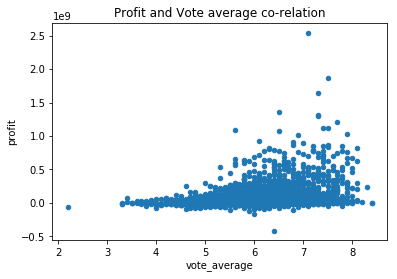

In [33]:
#Research Question 5 - Is there a Corelation between movie score and profit?
ax=tmdb_df_profit.plot(x='vote_average', y='profit', kind='scatter')
ax.set_title('Profit and Vote average co-relation')

### Research Question 9 - Is there a Corelation between movie score and popularity?

Below we can see a positive corelation between votate_average and popularity.

Text(0.5,1,u'Profit and popularity co-relation')

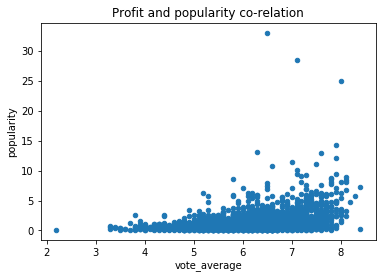

In [34]:
ax=tmdb_df_profit.plot(x='vote_average', y='popularity', kind='scatter')
ax.set_title('Profit and popularity co-relation')

### Research Question 10 - Whom are some of the dominant actors?

In [35]:
tmdb_df.groupby('cast').count()['id'].sort_values(ascending=False)[0:16]
#tmdb_df.groupby('cast').count()['id'].sort_values(ascending=False)[0:10].plot(kind='bar')

cast
Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Johnny Depp              37
Tom Hanks                37
Sylvester Stallone       36
Jean-Claude Van Damme    35
Steven Seagal            35
John Travolta            33
Robin Williams           33
Denzel Washington        33
Tom Cruise               31
Harrison Ford            30
Steve Martin             30
John Cusack              30
Name: id, dtype: int64

In [36]:
tmdb_df_profit.query('vote_average > 8 and vote_count > 217').iloc[:, np.r_[5,11,14,16,20]].reset_index(drop=True)

,original_title,genres,vote_count,release_year,profit_level
0,The Dark Knight,Drama,8432,2008,High
1,Forrest Gump,Comedy,4856,1994,High
2,Schindler's List,Drama,2632,1993,High
3,The Godfather,Drama,3970,1972,High
4,Pulp Fiction,Thriller,5343,1994,High
5,Fight Club,Drama,5923,1999,Moderately High
6,The Godfather: Part II,Drama,2131,1974,Moderately High
7,Whiplash,Drama,2372,2014,Medium
8,The Shawshank Redemption,Drama,5754,1994,Medium


<a id='conclusions'></a>
## Conclusions


- We can see that Drama and Comedy are dominiating most profitable genres and overall genre count.

- Popular movies tend to get more vote counts.

- Most popular movies with a rating higher than 8 and vote_count higher than average are likely to be Drama.

- James Cameron is one of the best profit making directors.


One of the challenges that we've faced is not having the profit column deduced, and when I wanted to computer it I've found I have lots of revenues missing, then again I've found lots of budget values missing. In the near future, I will write a web craweler that takes the budget from IMDB and updates the missing ones. I've went through the html code of imdb which seemed plausible and sturcture was easy straight forward.

Other challenges where multi-valued columns in genres and cast, but this was overcomed by splitting and taking the first value.
